# Homework 1 from Martin Gräf, Richard Baumann and Thomas Block

The main focus in this homework will be the ising model. In this particular example we look at a one-dimensional version of the modell, which describes a chain of spins. Due to this one-dimensionallity, if we observe one particle in the chain, it has only two neighbours. 

The Hamiltionian of the system can be written as: 

\begin{equation}
    H(\sigma) = - J \sum_{\langle x~y\rangle} \sigma_x \sigma_y - h \sum_x \sigma_x
\end{equation}





## Exercise 1: Discuss the physical meaning of J, in particular the sign of J, and the role it plays in magnets, for example.
In the equation above, J is a coupling constant, which decribes the interaction between the magnetic moments:

*  J<0: spins are aligned mostly antiparallel. The interaction is called antiferromagenitc.
*  J=0: spins are non-interacting.
*  J>0: spins are aligned mostly parallel. The interaction called ferromagenitc.

## Exercise 2: Clarify what it means to have periodic boundary conditions (nearest neighbors)

In order to calculate a very large (in most cases infinite) problem an approximation has to be made. An approximation that can be made is to think of the problem as periodic. Therefore if one part of the problem is solved, the whole problem is solved. In this problem only the nearest neighbours are considerd.



## Exercise 3: Implement the Ising 1d simulation: 

In [1]:
#just importing stuff, nothing to see here yet :)

import numpy as np 
import random as rd
import matplotlib.pyplot as plt
import math
import itertools 

As previously mentioned, the hamiltionian is calculated by:

\begin{equation}
    H(\sigma) = - J \sum_{\langle x~y\rangle} \sigma_x \sigma_y - h \sum_x \sigma_x.
\end{equation}

That can be implemented as a function.

In [2]:
#Calculate Hamiltonian. J and h are floats, the spin is supposed to be an array.
def hamiltionian(spin, j, h):
    minuend = 0
    subtrahend = 0
    for i in range(len(spin)-1):
        minuend = minuend + spin[i]*spin[i+1]
        subtrahend = subtrahend + spin[i] 
    return (-j*minuend-h*subtrahend)

We assume, that the spins are distributed following a Bolzmann distribution (a fact, that is given by the exercise sheet):

\begin{equation}
    P(s)=\frac{ exp \big[-\frac{H(s)}{k_{b}T} \big]}{\sum_{s`} exp \big[-\frac{H(s`)}{k_{b}T}\big]}  = \frac{1}{Z} exp \big[-\frac{H(s)}{k_{b}T} \big].
\end{equation}

Therefore Z can be determined via:

\begin{equation}
    Z={\sum_{s`} exp \big[-\frac{H(s`)}{k_{b}T}\big]} 
\end{equation}

In [3]:
def z_simulated(spin_configurations, j, h, t):
    sum=0
    for i in range(len(spin_configurations)):
        sum=sum+np.exp(-hamiltionian(spin_configurations[i], j, h)/t)
    return (sum)

Now an array has to be generated, that contains all possible spin configurations:

In [4]:
def gen_spinarrays(length):
    return(list(itertools.product([-1, 1], repeat=(length))))

The function above returns all possible cominations of 1 and -1. However, the Task did not ask for that. Instead a certain amount of randomly filled arrays should have been generated in order to get a result. This is done in the next block:

In [5]:
def gen_spinarrays_randomly(length, ammount):
    configurations=[]
    current_configuration=[]
    for j in range(ammount):
        for i in range(length):
            #a random integer between 1 and 3 (1, 2)
            current_configuration=current_configuration+[2*rd.randint(1, 2)-3]
        configurations=configurations+[current_configuration]
        current_configuration=[]
    return configurations

Now we can also implement the numerical solution that is given on the exercise sheet:

\begin{equation}
    Z=\lambda_{+}^{N}+\lambda_{-}^{N}, 
\end{equation}

with:

\begin{equation}
    \lambda_{\pm}=e^{\frac{J}{T}} \big( \cosh(\frac{h}{T}) \pm \sqrt{\sinh(\frac{h}{T})^{2}+ e^{-4\frac{J}{T}}} \big).
\end{equation}


In [6]:
def lambda_pm(j, h, t, plus_minus):
    plus_minus_part=plus_minus*(np.sinh(h/t)**2+np.exp(-4*j/t))**(1/2)
    return(np.exp(j/t)*(np.cosh(h/t)+plus_minus_part))

def z_analytical(lenght, j, h, t):
    return(lambda_pm(j, h, t, 1)**lenght+lambda_pm(j, h, t, -1)**lenght)

Finally, the magnetization per spin is defined as:

\begin{equation}
    <m>=+\frac{T}{N}\frac{\partial log(Z)}{\partial h} 
\end{equation}

In [7]:
def magnetization_random_configurations(lenght, amount, j, h, t, intervall):
    array=gen_spinarrays_randomly(lenght, amount)
    z_1=z_simulated(array, j, h+(intervall/2), t)
    z_2=z_simulated(array, j, h-(intervall/2), t)
    return (1/lenght*((np.log(z_1)-np.log(z_2))/intervall))

def magnetization_all_possible_configurations(lenght, j, h, t, intervall):
    z_1=z_simulated(gen_spinarrays(lenght), j, h+(intervall/2), t)
    z_2=z_simulated(gen_spinarrays(lenght), j, h-(intervall/2), t)
    return (1/lenght*((np.log(z_1)-np.log(z_2))/intervall))

def magnetization_analytical(lenght, j, h, t, intervall):
    z_1=z_analytical(lenght, j, h+(intervall/2), t)
    z_2=z_analytical(lenght, j, h-(intervall/2), t)
    return (1/lenght*((np.log(z_1)-np.log(z_2))/intervall))


Now we can put some numbers into our calculations:
*  J=1 (given on the exercise sheet)
*  N=8 to make the calculation a bit faster (see below)
*  h=0.5 value was choosen randomly but will be analyzed later on
*  t=1

We can look at Z with the analytical and the simulated solution. In fact we actually have two simulated solutions for Z, one originating from a random configuration of spins, and one being calculated by looking at all possible spin configurations. The latter was not asked by the exercise sheet, however our first interpretation of the problem was to generate all possible spin configurations, therefore we implemented this solution.

In [8]:
N=8
J=1
h=0.5
t=1
number_of_values=1000

Now we can compare the magnetization outcomes. We are tasked with investigating the dependance of <m> on N.

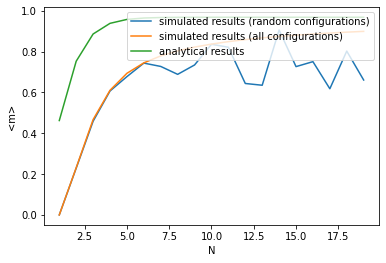

In [9]:
N_array=np.arange(1, 20, 1)
magnetization_N_dependance_simulation_random=np.zeros(len(N_array))
magnetization_N_dependance_simulation_all_possible=np.zeros(len(N_array))
magnetization_N_dependance_analytical=np.zeros(len(N_array))
for i in range(len(N_array)):
    magnetization_N_dependance_simulation_random[i]=magnetization_random_configurations(N_array[i], number_of_values, J, h, t, 0.01)
    magnetization_N_dependance_simulation_all_possible[i]=magnetization_all_possible_configurations(N_array[i], J, h, t, 0.01)
    magnetization_N_dependance_analytical[i]=magnetization_analytical(N_array[i], J, h, t, 0.01)
plt.plot(N_array, magnetization_N_dependance_simulation_random, label="simulated results (random configurations)")
plt.plot(N_array, magnetization_N_dependance_simulation_all_possible, label="simulated results (all configurations)")
plt.plot(N_array, magnetization_N_dependance_analytical, label="analytical results")
plt.legend(loc="upper right")
plt.xlabel("N")
plt.ylabel("<m>")

plt.savefig("Diagramm_N_m.png", dpi=300)

The meaning of the three curves above are:
* simulated results (random configurations) = The magnetization that resulted from generating an array with randomly assighned spin configurations.
* simulated results (all configurations) = The magnetization that resulted from generating an array all possible spin configurations.
* analytical results = The magnetization that resulted from using the analytical solution.

What we can see, is that all results show roughly the same behaviour. The simulated results, for both all and randomly generated configurations seem to be off by a factor, which could be incorporated by a correction factor. However the simulated results using all spin configurations resemble the analytical results the most. The simulated results using random configurations look similar to the ones using all possible configurations for small N, however starting at N>10 the results diverge from the simulated using all configurations. 

This is an expected result, because the number of random configured arrays is fixed to 1000 in this example. All possible spin-configurations can be calculated with:
\begin{equation}
    n_{\text{number of possible configurations}}=2^{N} \text{, moreover : } 2^{10}=1024
\end{equation}

Therefore with 1000 random configured arrays we expect to get less accurate results at N=10, not all arrays are represented in random configurations.

Now we take a look at the dependace of <m> on h:

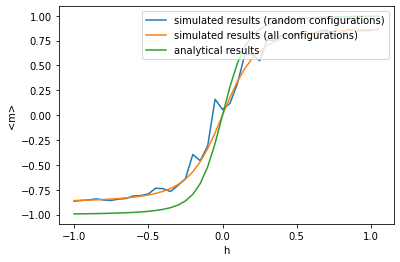

In [10]:
h_array=np.arange(-1, 1.1, 0.05)
magnetization_h_dependance_simulation_random=np.zeros(len(h_array))
magnetization_h_dependance_simulation_all_possible=np.zeros(len(h_array))
magnetization_h_dependance_analytical=np.zeros(len(h_array))
for i in range(len(h_array)):
    magnetization_h_dependance_simulation_random[i]=magnetization_random_configurations(N, number_of_values, J, h_array[i], t, 0.01)
    magnetization_h_dependance_simulation_all_possible[i]=magnetization_all_possible_configurations(N, J, h_array[i], t, 0.01)
    magnetization_h_dependance_analytical[i]=magnetization_analytical(N, J, h_array[i], t, 0.01)
plt.plot(h_array, magnetization_h_dependance_simulation_random, label="simulated results (random configurations)")
plt.plot(h_array, magnetization_h_dependance_simulation_all_possible, label="simulated results (all configurations)")
plt.plot(h_array, magnetization_h_dependance_analytical, label="analytical results")
plt.legend(loc="upper right")
plt.xlabel("h")
plt.ylabel("<m>")
plt.savefig("Diagramm_h_m.png", dpi=300)

This also looks as expected: The analytical result is mostly echoed by the simulated one that uses all configurations, which seem to be off by a correctional factor. The result using randomly generated results seems to be in the right shape, but errors in calculating the result are obvious.

Following this investigation of the dependency of <m> on both N and h, we are looking deeper into the error, that the randomly generated spin configurations seem to have. These randomly generated configurations are always different, which can be seen by running the code above multiple times. The outcome using the random configurations is different from run to run.

In order to get the errors of these simulated values, we can just do multiple runs of the code and look at the mean and the varaince:

\begin{equation}
		\left< <m> \right>=\frac{\sum_{i}<m>_{i}}{N}
\end{equation}

\begin{equation}
		\sigma_{<m>}=\frac{(\sum_{i}\left< <m> \right>-<m>_{i})^{2}}{N}
\end{equation}

In [11]:
def mean(array):
    mean=0
    for i in range(len(array)):
        mean=mean+array[i]
    return (mean/len(array))

def variance(array, mean):
    variance=0
    for i in range(len(array)):
        variance=variance+(mean-array[i])**2
    return (variance/len(array))

Now we can calculate multiple values for Z with randomly generated spin configurations. To ensure that here we have some consistency, we will use the random number generator with a set seed, that is changed. 

In [12]:
def z_averaged(N, number_of_values, J, h, t, interval):
    z_with_mulible_values=[]

    for i in range(100):
        #sets the seed to i
        rd.seed(i)
        z_with_mulible_values=z_with_mulible_values+[magnetization_random_configurations(N, number_of_values, J, h, t, interval)]
    return(mean(z_with_mulible_values), variance(z_with_mulible_values, mean(z_with_mulible_values)))
z_av=z_averaged(N, number_of_values, J, h, t, 0.01)
print("Mean:", z_av[0], "Variance:", z_av[1])

Mean: 0.7821994515111812 Variance: 0.00314194127903415


In order to see, if this error estimation is good, we can look at the dependencies of <m> on N and h again, this time with averaged values:

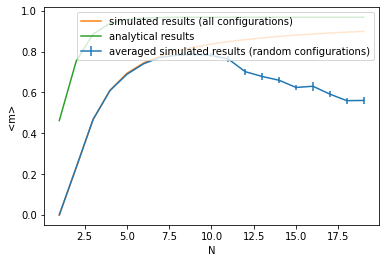

In [13]:
N_array=np.arange(1, 20, 1)
magnetization_N_dependance_simulation_random=np.zeros(len(N_array))
magnetization_N_dependance_simulation_random_error=np.zeros(len(N_array))
magnetization_N_dependance_simulation_all_possible=np.zeros(len(N_array))
magnetization_N_dependance_analytical=np.zeros(len(N_array))
for i in range(len(N_array)):
    z_av=z_averaged(N_array[i], number_of_values, J, h, t, 0.01)
    magnetization_N_dependance_simulation_random[i]=z_av[0]
    magnetization_N_dependance_simulation_random_error[i]=z_av[1]
    magnetization_N_dependance_simulation_all_possible[i]=magnetization_all_possible_configurations(N_array[i], J, h, t, 0.01)
    magnetization_N_dependance_analytical[i]=magnetization_analytical(N_array[i], J, h, t, 0.01)
plt.errorbar(N_array, magnetization_N_dependance_simulation_random, yerr=magnetization_N_dependance_simulation_random_error, label="averaged simulated results (random configurations)")
plt.plot(N_array, magnetization_N_dependance_simulation_all_possible, label="simulated results (all configurations)")
plt.plot(N_array, magnetization_N_dependance_analytical, label="analytical results")
plt.legend(loc="upper right")
plt.xlabel("N")
plt.ylabel("<m>")

plt.savefig("Diagramm_N_m_averaged.png", dpi=300)

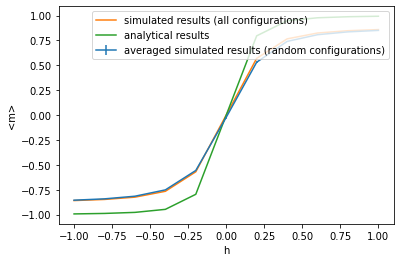

In [14]:
h_array=np.arange(-1, 1.1, 0.2)
magnetization_h_dependance_simulation_random=np.zeros(len(h_array))
magnetization_h_dependance_simulation_random_error=np.zeros(len(h_array))
magnetization_h_dependance_simulation_all_possible=np.zeros(len(h_array))
magnetization_h_dependance_analytical=np.zeros(len(h_array))
for i in range(len(h_array)):
    z_av=z_averaged(N, number_of_values, J, h_array[i], t, 0.01)
    magnetization_h_dependance_simulation_random[i]=z_av[0]
    magnetization_h_dependance_simulation_random_error[i]=z_av[1]
    magnetization_h_dependance_simulation_all_possible[i]=magnetization_all_possible_configurations(N, J, h_array[i], t, 0.01)
    magnetization_h_dependance_analytical[i]=magnetization_analytical(N, J, h_array[i], t, 0.01)
plt.errorbar(h_array, magnetization_h_dependance_simulation_random, yerr=magnetization_h_dependance_simulation_random_error, label="averaged simulated results (random configurations)")
plt.plot(h_array, magnetization_h_dependance_simulation_all_possible, label="simulated results (all configurations)")
plt.plot(h_array, magnetization_h_dependance_analytical, label="analytical results")
plt.legend(loc="upper right")
plt.xlabel("h")
plt.ylabel("<m>")
plt.savefig("Diagramm_h_m_averaged.png", dpi=300)

In these pictures it is visable, that taking averaged values gives mixed results. 

For the Diagramm, that shows <m> in relation to h we see, that the simulated results using random configurations fits the simulated results from all configurations very well. This seems to be a definite improvement. However both simulated solutions still deviate from the analytical one.

For the Diagramm, that shows <m> in realtion to N, we see that the the simulated results using random configurations still deviate a lot from the analytical ones. We can also see, that if N becomes higher, the difference between the simulated results (random configurations vs all configurations) also becomes larger. Therefore we see, that this seems to be a trend among the random configurated results. 

One possible explatnation for both above mentioned effects could be the implications of N for the number of possible configurations. As elaborated before, the possible number of spin configurations is 2^N. As stated before with 1000 random configured arrays we expect to get less accurate results at N=10, not all arrays are represented in random configurations. This could be the reason that the graph, that looks at the realtion of <m> and h looks good, because it was made by using N=8. 

The next logical step now would be to increase the number of randomly generated spin configuations. Here we are confronted by the curse of dimensionality. Therefore the next block might take a !LONG! time executing. However this already ran on one of our pcs, so the resulting picture can be found in this folder as "Diagramm_N_m_averaged_more_configurations.png". 

Doing N= 0
Doing N= 1
Doing N= 2
Doing N= 3
Doing N= 4
Doing N= 5
Doing N= 6
Doing N= 7
Doing N= 8
Doing N= 9
Doing N= 10
Doing N= 11
Doing N= 12
Doing N= 13
Doing N= 14
Doing N= 15
Doing N= 16
Doing N= 17
Doing N= 18


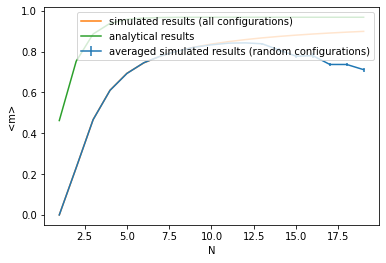

In [15]:
number_of_values=10000

N_array=np.arange(1, 20, 1)
magnetization_N_dependance_simulation_random=np.zeros(len(N_array))
magnetization_N_dependance_simulation_random_error=np.zeros(len(N_array))
magnetization_N_dependance_simulation_all_possible=np.zeros(len(N_array))
magnetization_N_dependance_analytical=np.zeros(len(N_array))
for i in range(len(N_array)):
    print("Doing N=", i)
    z_av=z_averaged(N_array[i], number_of_values, J, h, t, 0.01)
    magnetization_N_dependance_simulation_random[i]=z_av[0]
    magnetization_N_dependance_simulation_random_error[i]=z_av[1]
    magnetization_N_dependance_simulation_all_possible[i]=magnetization_all_possible_configurations(N_array[i], J, h, t, 0.01)
    magnetization_N_dependance_analytical[i]=magnetization_analytical(N_array[i], J, h, t, 0.01)
plt.errorbar(N_array, magnetization_N_dependance_simulation_random, yerr=magnetization_N_dependance_simulation_random_error, label="averaged simulated results (random configurations)")
plt.plot(N_array, magnetization_N_dependance_simulation_all_possible, label="simulated results (all configurations)")
plt.plot(N_array, magnetization_N_dependance_analytical, label="analytical results")
plt.legend(loc="upper right")
plt.xlabel("N")
plt.ylabel("<m>")

plt.savefig("Diagramm_N_m_averaged_more_configurations.png", dpi=300)

The picture above shows that the simulated results are matching more after increasing the number of generated spin configurations. However this comes at a large cost, since our pcs took about 15 minutes in order to calculate the result. However it shows, that the simulated results that are taking into account all configurations and the results that rely on randomly generated configurations could agree. However, the computational power required for that would be to much to ask for in our opinion. 